In [1]:
#1. Principal Component Analysis helps with dimensionality reduction of highly dimensional datasets.
#It is one of the most popular linear dimension reduction algorithms.
#It is a projection based method that transforms the data by projecting it onto a set of orthogonal (perpendicular) axes.

In [2]:
#2. Objective
#The need for identifying breast cancer in it's early stages has been increasing.
#The Wisconsin Diagnostic Laboratories have a good record of diagnosing patients with cancer in their early stages.
#But it is a time critical process to generate, analyze and predict if a particular nucleus can be malignant or benign.

#They have hired you to help them develop a predictor that can predict if a nucleus can be harmful or not.
#They have provided you with dimensions and other concerned feautres of the nucleus of past patients along with their results.
#The objective is to classify if a patient can potentially suffer from breast cancer or not

In [84]:
#3. Installing and importing libraries

import pandas as pd                                                 # Importing for panel data analysis
import numpy as np                                                  # Importing package numpys (For Numerical Python)

import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline

from sklearn.preprocessing import StandardScaler                    # To import a standard scaler for scaling the features
from sklearn.model_selection import train_test_split                # To split the data into train and test datasets
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a random forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression                 # To instantiate a logistic regression classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy score of the classifiers
from sklearn.decomposition import PCA                               # To instantiate Principal Component Analysis

import time                                                         # For time functionality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [4]:
#4. Data Acquisition and description


#The features in the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
#They describe characteristics of the cell nuclei present in the image.
#Records	Features	Dataset Size
#569	33	122 KB
#The dataset has ten real-valued features that are computed for each cell nucleus:
#a) radius (mean of distances from center to points on the perimeter)
#b) texture (standard deviation of gray-scale values)
#c) perimeter
#d) area
#e) smoothness (local variation in radius lengths)
#f) compactness (perimeter^2 / area - 1.0)
#g) concavity (severity of concave portions of the contour)
#h) concave points (number of concave portions of the contour)
#i) symmetry
#j) fractal dimension ("coastline approximation" - 1)
#The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
#For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


#Id	Feature	Description
#01	id	ID number
#02	diagnosis	Diagnosis (M = malignant, B = benign)
#03	radius_mean	Mean radius
#04	texture_mean	Mean texture
#05	perimeter_mean	Mean perimeter
#06	area_mean	Mean Area
#07	smoothness_mean	Mean Smoothness
#08	compactness_mean	Mean Compactness
#09	concavity_mean	Mean Concavity
#10	concave_points_mean	Mean number of concave portions
#11	symmetry_mean	Mean Symmetry
#12	fractal_dimension_mean	Mean Fractal Dimension
#13	radius_se	Standard Error of Radius
#14	texture_se	Standard Error of texture
#15	perimeter_se	Standard Error of Perimeter
#16	area_se	Standard Error of Area
#17	smoothness_se	Standard Error of Smoothnes
#18	compactness_se	Standard Error of Compactness
#19	concavity_se	Standard Error of Concavity
#20	concave_points_se	Standard Error of number of concave portions
#21	symmetry_se	Standard Error of Symmetry
#22	fractal_dimension_se	Standard Error of Fractal dimension
#23	radius_worst	Worst/Largest radius measured
#24	texture_worst	Worst/Largest texture measured
#25	perimeter_worst	Worst/Largest perimeter measured
#26	area_worst	Worst/Largest area measured
#27	smoothness_worst	Worst/Largest smoothness measured
#28	compactness_worst	Worst/Largest compactness measured
#29	concavity_worst	Worst/Largest concavity measured
#30	concave_points_worst	Highest no. of concave portions measured
#31	symmetry_worst	Worst/Largest symmetry measured
#32	fractal_dimension_worst	Worst/Largest Fractal dimension measured
#33	Unnamed: 32	Unknown



In [87]:
#4.1 Data Acquisition
cancer = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/cancer.csv")
print('Shape of the dataset:', cancer.shape)
cancer.head()

Shape of the dataset: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#4.2 Data Description

cancer.describe()

#Mean radius- of nuclei range from 6.9 units to 28.11 unit.

#More than 75% nuclei measured have mean radius greater than 11 units.

#More than 50% nuclei measured have mean radius greater than 13 units.

#More than 25% nuclei measured have mean radius greater than 15 units.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
cancer.info()

#No vartiable has missing value except unnamed
#All variables are float except id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

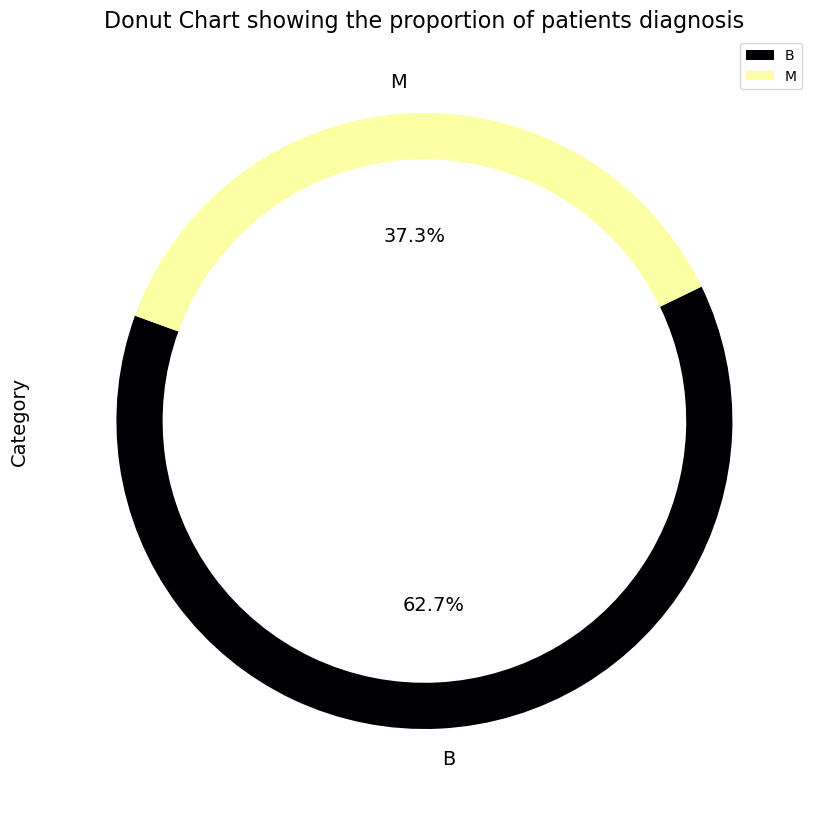

In [11]:
#5. Data Pre-processing

#5.1 Pie chart on Dependent variable-i.e 'diagnosis'

# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[10,10])



# Using magic of pandas pie() function
cancer['diagnosis'].value_counts().plot(kind='pie', fontsize=14,
                                      autopct='%3.1f%%', wedgeprops=dict(width=0.15),
                                      startangle=160, cmap='inferno', legend=True)
plt.ylabel(ylabel='Category',size=14)
plt.title(label='Donut Chart showing the proportion of patients diagnosis', size=16)
plt.show()

#37.3% PATIENTS were diagnosed with malignant cancer

In [88]:
#5.2 Dropping the variable 'Unnamed: 32' as has missing values
#cancer.drop(labels=['Unnamed: 32'], axis=1, inplace = True)
def delete_cancer(data=None):
    data.drop(columns=['Unnamed: 32'], inplace=True)
    return data.head()


In [89]:
delete_cancer(data=cancer)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [90]:
#5.3 converting diagnosis variable into binary

def convert_diagnosis(data=None):
    return data['diagnosis'].map(arg={'M':1, 'B': 0})


cancer['diagnosis'] = convert_diagnosis(data=cancer)
cancer.head()

#map() takes two arguments at most. The first parameter is which 
#function to apply to each element. This is a required parameter. 
#The second parameter is optional and is provided with the function to be used as the this keyword.

#args allows us to pass a variable number of non-keyword arguments to a Python function.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
cancer['diagnosis'].describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [52]:
cancer['diagnosis'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [53]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
#5.3 Making a displot for any of the independent features concerning diagnosis

def make_displot(data=None, column=None):

  # Create a distplot with column name and keep hue as diagnosis
  sns.displot(x=column, 
              hue='diagnosis', 
              kde=True,
              data=data,
              palette='hls',
              aspect=3)

  # Add cosmetics
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel=column, size=14)
  plt.ylabel(ylabel='Count', size=14)
  plt.title(label=('Diagnosis on basis of ' + column), size=16)
  plt.grid(b=True)

  # Display the output
  plt.show()

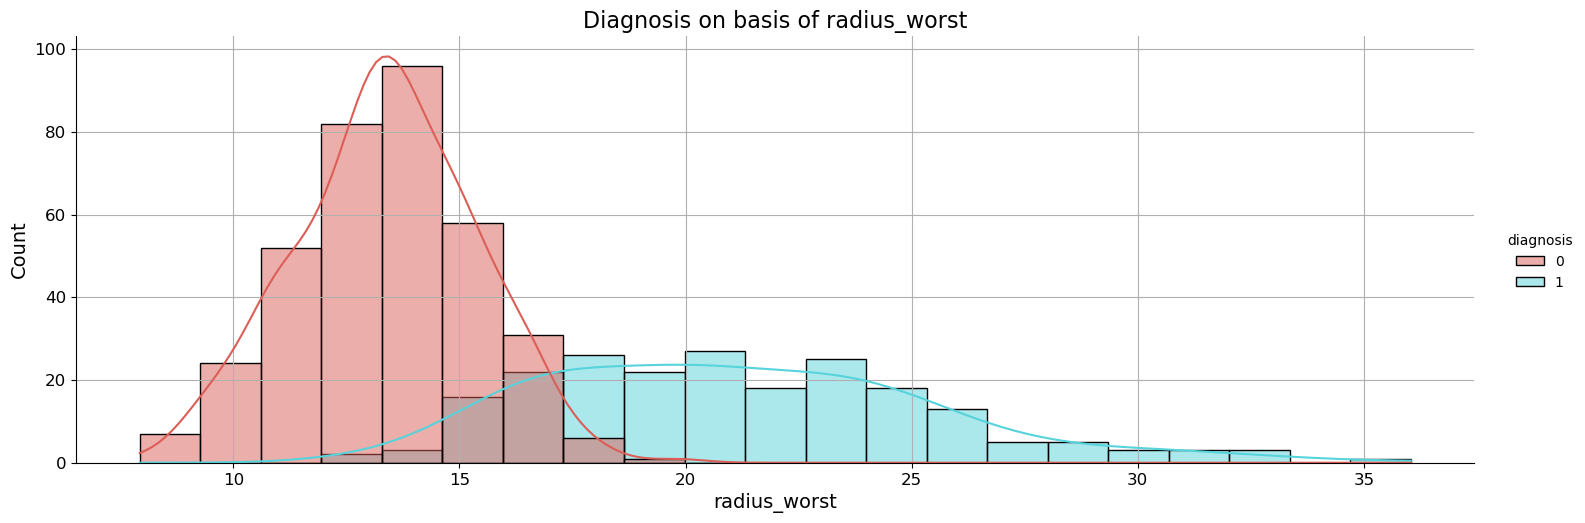

In [25]:
make_displot(data=cancer, column='radius_worst')

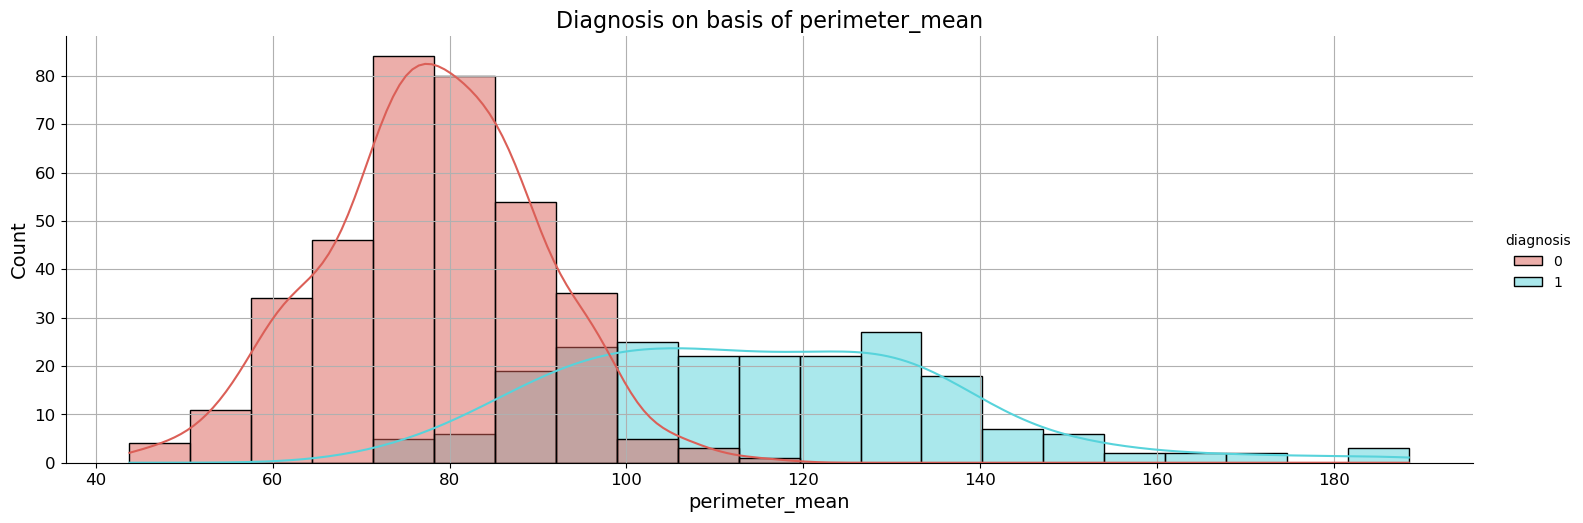

In [26]:
make_displot(data=cancer, column='perimeter_mean')

In [ ]:
#5.4 Creating a scatterplot between any two independent features concerning diagnosis feature

In [28]:
def make_scatter(data=None, column_x=None, column_y=None):
  # Create a figure of size 10 x 10 inches
  fig = plt.figure(figsize=(10, 10))

  # Create a scatterplot with column names and keep hue as diagnosis
  sns.scatterplot(x=column_x,
                  y=column_y,
                  hue='diagnosis',
                  data=data,
                  palette='Dark2',
                  edgecolor='black')

  # Add cosmetics
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel(xlabel=column_x, size=14)
  plt.ylabel(ylabel=column_y, size=14)
  plt.title(label=(column_x + ' vs ' + column_y + ' with respect to diagnosis'), size=16)
  plt.legend(labels=['Malignant', 'Benign'])
  plt.grid(b=True)
  
  # Display the output
  plt.show()

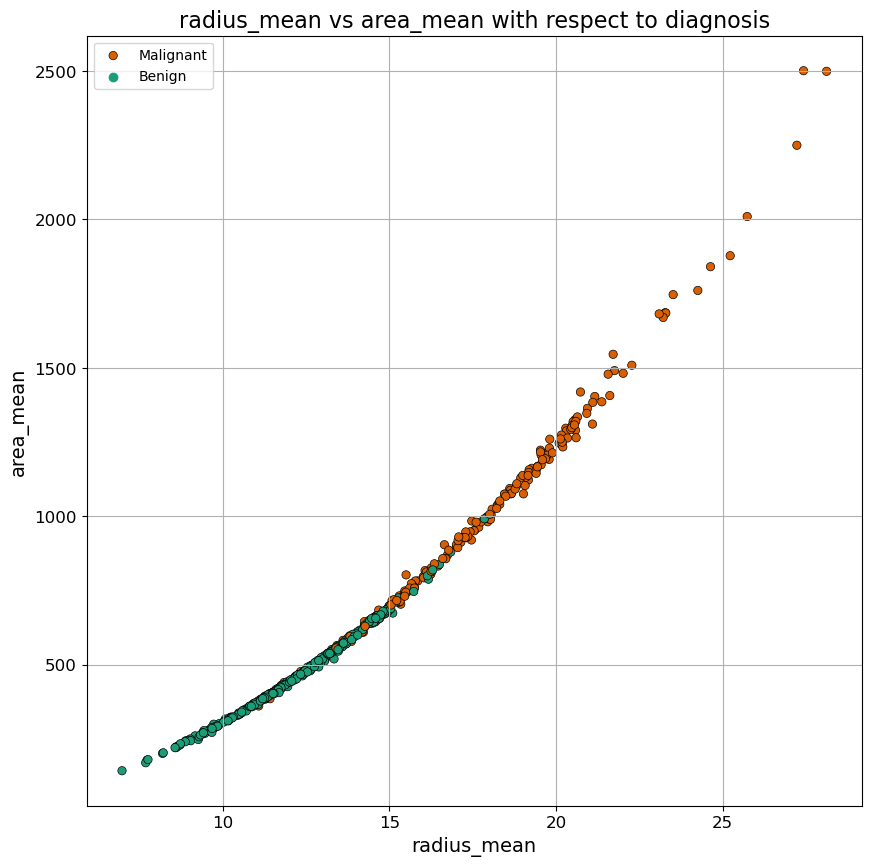

In [29]:
make_scatter(data=cancer, column_x='radius_mean', column_y='area_mean')

#The variables radius mean and area mean are highly correlated

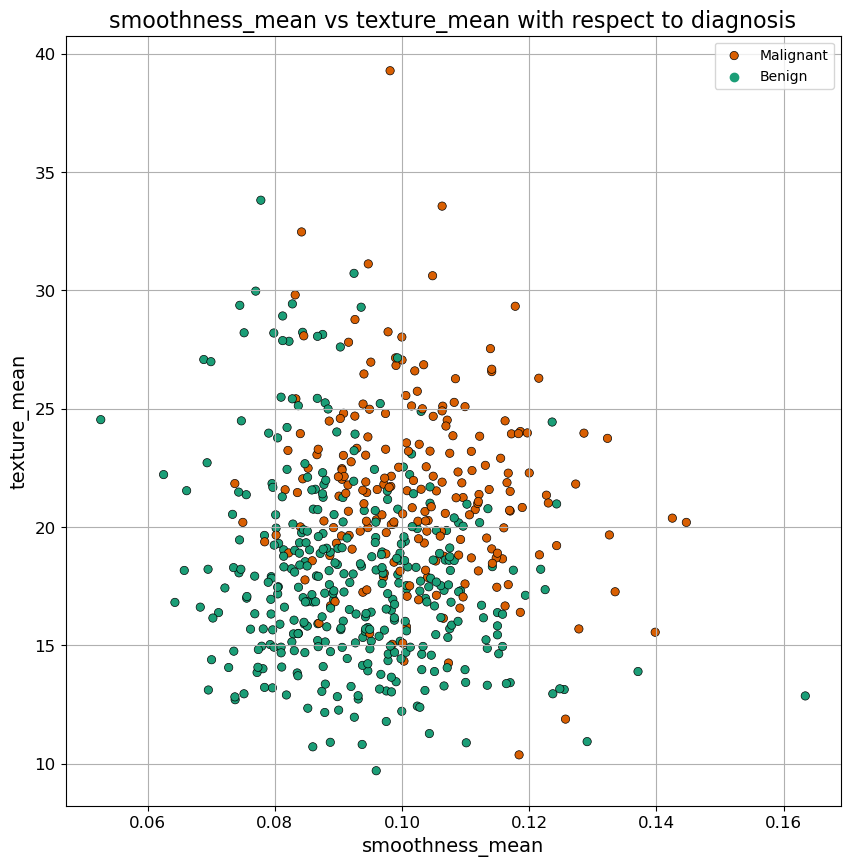

In [30]:
make_scatter(data=cancer, column_x='smoothness_mean', column_y='texture_mean')

#The features of smoothness mean and texture mean are not correlated. 

In [ ]:
#6 Feature Selection
#Here we will visualize  the correlation of input features using Heatmap.

In [21]:
cancer.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


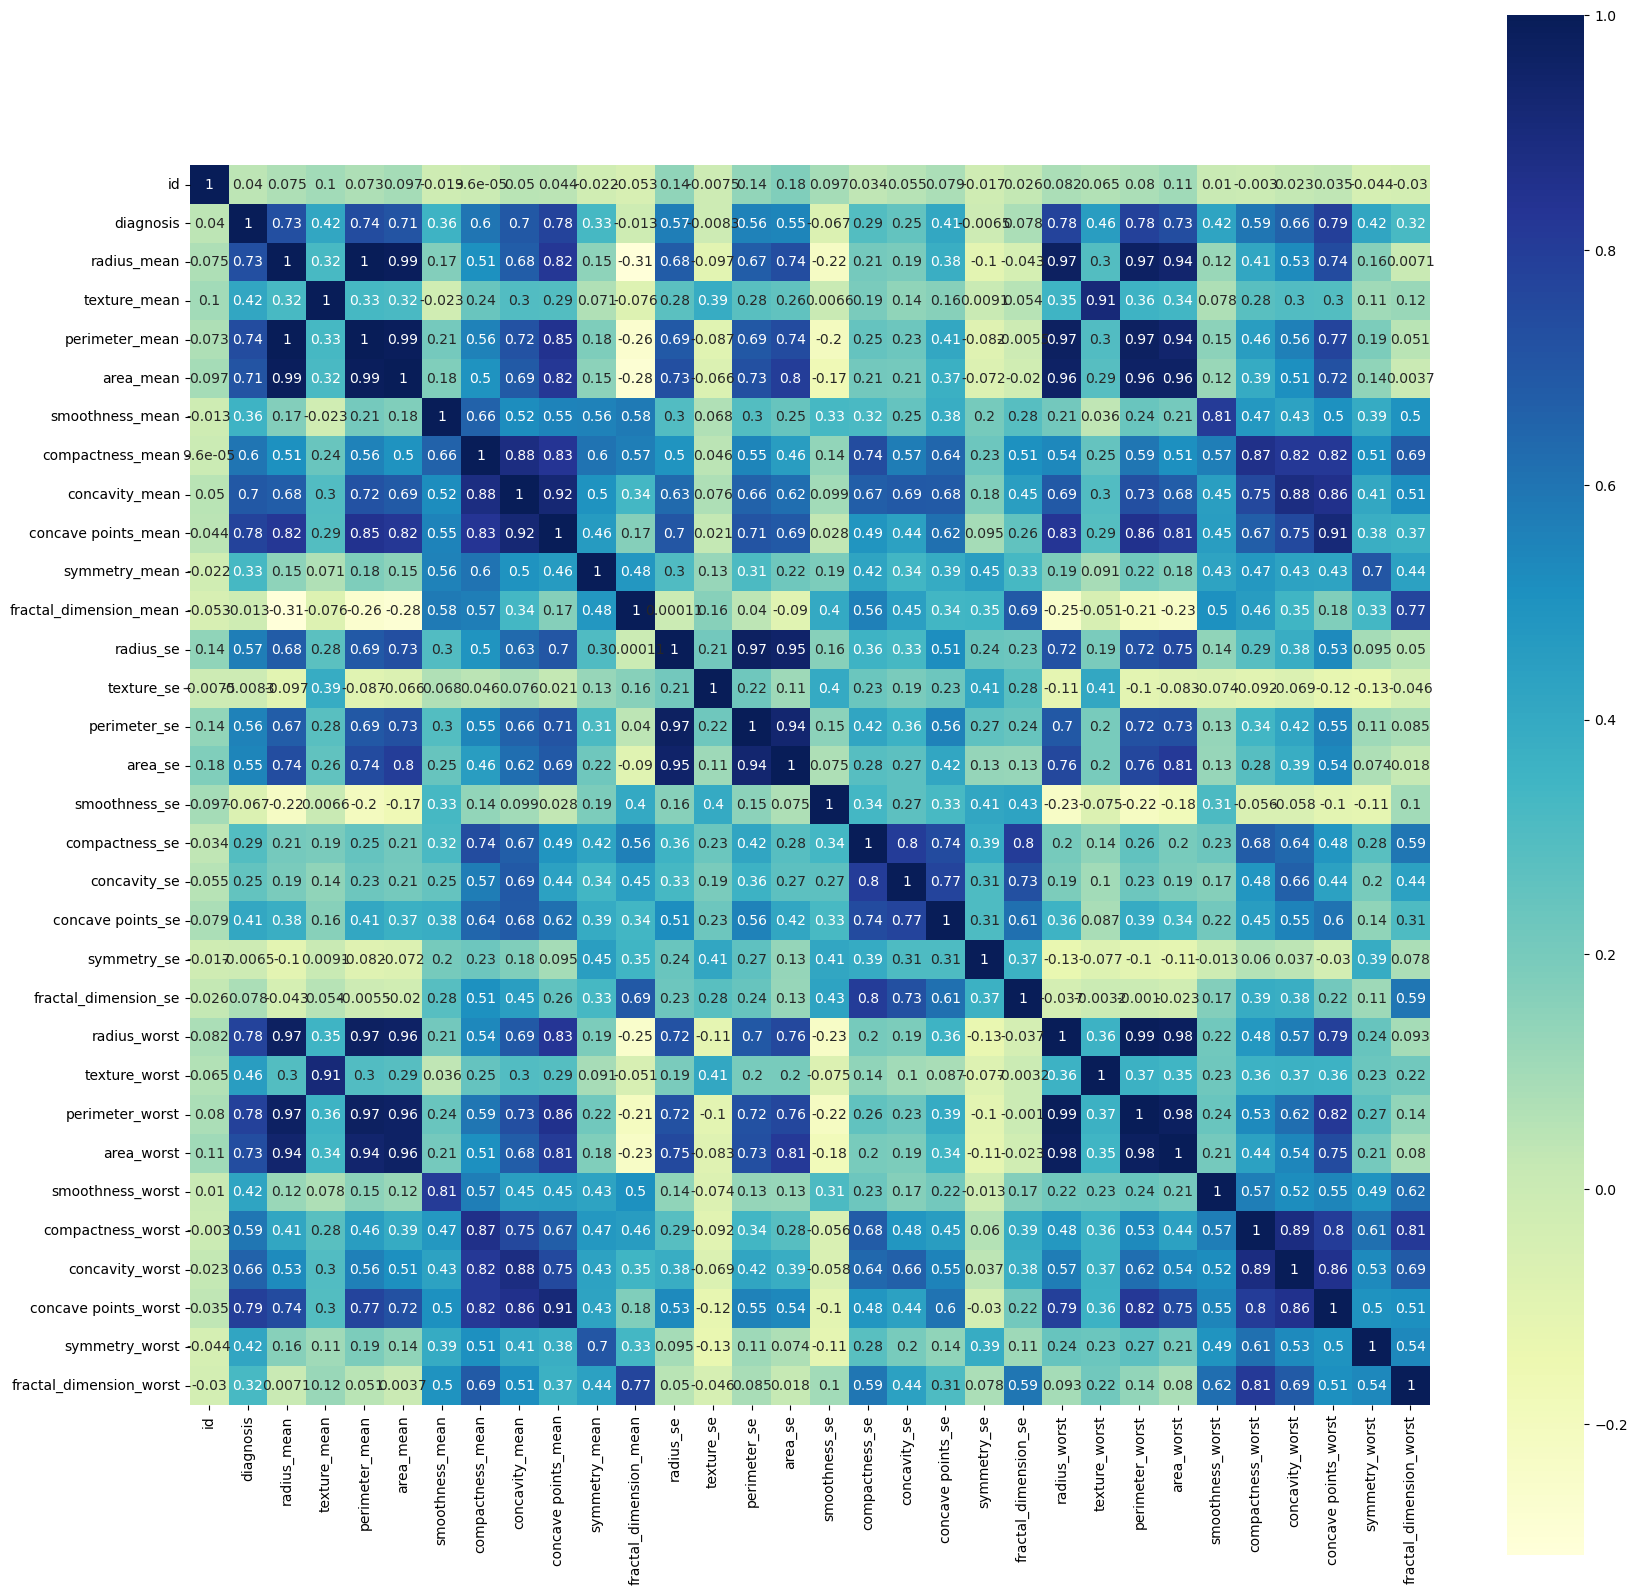

In [23]:
cor = cancer.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap='YlGnBu', annot=True, square=True)
plt.show()

#We can see diagnosis is correlated to 19 other features.
#But there is a significant amount of correlations between independent features as well.
#This causes redundancy in the classification. PCA will help us remove this redundancy.

In [91]:
#7. Data Post Processing

#7.1 Now we will split our data into dependent and independent sets.
#We will keep 75% data in the train set, and 25% data in the test set.


def feature_extract(data=None):
    X = data.drop(labels=['diagnosis'], axis=1)
    y = data['diagnosis']
    return X, y

X, y = feature_extract(data=cancer)

#In models where classifier is used we divide the data before doing scaling
#This separates the dependent variable and while scaling it does not gets affected and 
#gives faulty values including negatives

In [92]:
X.shape

(569, 31)

In [93]:
y.shape

(569,)

In [94]:
X.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [95]:
y.describe()

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [96]:
#7.2 Standardizing the columns of the dataframe of X using StandardScaler.

# Instantiating a standard scaler object
sc= StandardScaler()

#Transforming our data
scaled_data = sc.fit_transform(X)

#Inputting our transformed data in a dataframe
scaled_X = pd.DataFrame(data=scaled_data, columns=X.columns)

#Getting a glimpse of transformed data
scaled_X.head()

#Scaling of only data set X is done as to avoide the errors in y dataset using classifier model
#thus avoiding negative values in dependent variable

#This will be used by the train_test_split() function to ensure that both the train and test sets 
#have the proportion of examples in each class that is present in the provided “y” array.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [97]:
#7.3 splitting data into test and train


def data_split(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(X=scaled_X,y=y)

Training Data Shape: (426, 31) (426,)
Testing Data Shape: (143, 31) (143,)


In [98]:
#8. Model Developement and Evaluation

#8.1 Model Developement and Evaluation without PCA 

def models_initialize():
  return [RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

In [99]:
clfs = models_initialize()
clfs

[RandomForestClassifier(random_state=0), LogisticRegression(random_state=0)]

In [102]:
def train_n_eval(clfs=None, X_train=None, y_train=None, X_test=None, y_test=None):
    
 for clf in clfs:
    # Extracting model name
    model_name = type(clf).__name__
    
    #Calculate start time
    start_time=time.time()
    
    # Fit the model on train data
    clf.fit(X_train, y_train)
    
    # Make predictions using train data
    y_pred_train = clf.predict(X_train)
    
    # Calculate accuracy of the model
    clf_train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Make predictions using test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy of the model
    clf_accuracy = accuracy_score(y_test, y_pred)
    
    #calculate evaluated time
    elapsed_time = (time.time() - start_time)
    
    # Display the accuracy of the model
    print('----------------------------------------\n')
    print('Performance Metric of', model_name, ':')
    print('[Train Accuracy]:', clf_train_accuracy)
    print('[Test Accuracy]:', clf_accuracy)
    print('[Processing time]:', elapsed_time, 'seconds')
    print('----------------------------------------\n')
    

In [103]:
train_n_eval(clfs=clfs, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.9790209790209791
[Processing time]: 0.11246895790100098 seconds
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.965034965034965
[Processing time]: 0.012269020080566406 seconds
----------------------------------------



In [104]:
#8.2 In this section we will reduce train and test data using PCA

def apply_pca():

    pca = PCA(n_components=0.95, random_state=0)
    pca.fit(X_train)

    # Calculate the variance %
    var = np.cumsum(a=np.round(a=pca.explained_variance_ratio_, decimals=3)*100)

    print(str(len(pca.explained_variance_ratio_))+' components explain '+str(var[-1])+'% variance of the data')

    # Create a 10 x 7 inches figure
    fig = plt.figure(figsize=(10, 7))

    # Plot the variance graph
    plt.plot(var)

    # Add some cosmetics
    plt.ylabel(ylabel='% Variance Explained', size=14)
    plt.xlabel(xlabel='Number of Features', size=14)
    plt.title(label='PCA Analysis', size=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.ylim(bottom=30, top=100.5)
    plt.grid(b=True)

    # Show the output
    plt.show()


# Notes- When choosing the number of principal components (k), 
#we choose k to be the smallest value so that for example, 99% of variance, is retained.

#np.cumsum- Return the cumulative sum of the elements along a given axis. and np stands for numpy
#np.round - Evenly round to the given number of decimals.

11 components explain 95.39999999999999% variance of the data


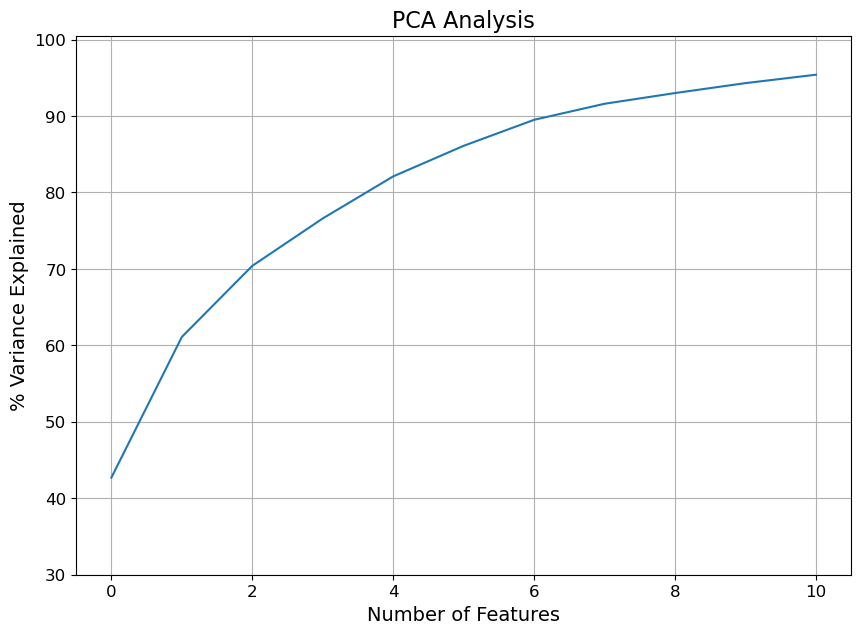

In [105]:
apply_pca()

In [ ]:
#8.4 Applying PCA with 11 components on X data set

In [111]:
def generate_pca(X_train=None, X_test=None):
    pca = PCA(n_components=11, random_state=0)
    X_train= pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    print('Shape of the train set after PCA reduction:', X_train.shape)
    print('Shape of the test set after PCA reduction:', X_test.shape)
    return X_train, X_test
    

In [112]:
X_train_pca, X_test_pca = generate_pca(X_train=X_train, X_test=X_test)

Shape of the train set after PCA reduction: (426, 11)
Shape of the test set after PCA reduction: (143, 11)


In [ ]:
#8.4 Developing new model using PCA reduced train and test data

In [113]:
train_n_eval(clfs=clfs, X_train=X_train_pca, y_train=y_train, X_test=X_test_pca, y_test=y_test)

----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.951048951048951
[Processing time]: 0.1029059886932373 seconds
----------------------------------------

----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.9882629107981221
[Test Accuracy]: 0.972027972027972
[Processing time]: 0.008176326751708984 seconds
----------------------------------------



In [ ]:
#9. Conclusion

#We can see that the newly trained models have scored similar accuracies.
#These models seem to be fitted well on the reduced data.
#We observe a comparable accuracy even after reducing the features.

#We can use the above two models to check their performance on some undisclosed records.
#This will help us to get a general idea of their real-time accuracy.
#The achieved performance then can be used to compare and finalize our model for breast cancer detection.